<a href="https://colab.research.google.com/github/akashgoyal-20/Cognitive-Computing-Assignments/blob/main/Cognitive_Computing_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

text = """Artificial Intelligence is transforming industries worldwide.
It enables machines to learn from data and make decisions.
From healthcare to finance, AI is driving efficiency"""

clean_text=text.lower()
clean_text=re.sub(r'[^\w\s]','',text)
print(clean_text)
words=word_tokenize(text)
sentence=sent_tokenize(text)

split_words=clean_text.split()
print(split_words)
print(words)
print(sentence)

stop_words=set(stopwords.words('english'))
filtered_words=[word for word in words if word not in stop_words]
print(filtered_words)
freq_dist = FreqDist(filtered_words)
for word, freq in freq_dist.items():
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Artificial Intelligence is transforming industries worldwide 
It enables machines to learn from data and make decisions 
From healthcare to finance AI is driving efficiency
['Artificial', 'Intelligence', 'is', 'transforming', 'industries', 'worldwide', 'It', 'enables', 'machines', 'to', 'learn', 'from', 'data', 'and', 'make', 'decisions', 'From', 'healthcare', 'to', 'finance', 'AI', 'is', 'driving', 'efficiency']
['Artificial', 'Intelligence', 'is', 'transforming', 'industries', 'worldwide', '.', 'It', 'enables', 'machines', 'to', 'learn', 'from', 'data', 'and', 'make', 'decisions', '.', 'From', 'healthcare', 'to', 'finance', ',', 'AI', 'is', 'driving', 'efficiency']
['Artificial Intelligence is transforming industries worldwide.', 'It enables machines to learn from data and make decisions.', 'From healthcare to finance, AI is driving efficiency']
['Artificial', 'Intelligence', 'transforming', 'industries', 'worldwide', '.', 'It', 'enables', 'machines', 'learn', 'data', 'make', 'decisi

Question 2:

In [10]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

text = """Artificial Intelligence is transforming industries worldwide.
It enables machines to learn from data and make decisions.
From healthcare to finance, AI is driving efficiency"""

clean_text = re.sub(r'[^\w\s]','',text.lower())
alpha_words = re.findall(r'\b[a-z]+\b',clean_text)
words_tokenized = word_tokenize(clean_text)
print(words_tokenized)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]
print(filtered_words)

stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered_words]
print(stemmed)

lemmatize = WordNetLemmatizer()
lemmatized = [lemmatize.lemmatize(w) for w in filtered_words]
print(lemmatized)


[nltk_data] Downloading package wordnet to /root/nltk_data...


['artificial', 'intelligence', 'is', 'transforming', 'industries', 'worldwide', 'it', 'enables', 'machines', 'to', 'learn', 'from', 'data', 'and', 'make', 'decisions', 'from', 'healthcare', 'to', 'finance', 'ai', 'is', 'driving', 'efficiency']
['artificial', 'intelligence', 'transforming', 'industries', 'worldwide', 'enables', 'machines', 'learn', 'data', 'make', 'decisions', 'healthcare', 'finance', 'ai', 'driving', 'efficiency']
['artifici', 'intellig', 'transform', 'industri', 'worldwid', 'enabl', 'machin', 'learn', 'data', 'make', 'decis', 'healthcar', 'financ', 'ai', 'drive', 'effici']
['artificial', 'intelligence', 'transforming', 'industry', 'worldwide', 'enables', 'machine', 'learn', 'data', 'make', 'decision', 'healthcare', 'finance', 'ai', 'driving', 'efficiency']


Question 3:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
  " New Cancer Treatment Shows Promise"
  "Tech Giant Unveils Foldable Phone"
  "Local Park Reopens After Renovation"
]
count_vector=CountVectorizer()
bow_matrix=count_vector.fit_transform(texts)
print(f"Bag of Words -> {count_vector.get_feature_names_out()}")

tfidf=TfidfVectorizer()
tfidfmatrix=tfidf.fit_transform(texts)
print(f"TF-IDF -> {tfidf.get_feature_names_out()}")
print(tfidfmatrix.toarray())
for i,row in enumerate(tfidfmatrix.toarray()):
  top_idx=row.argsort()[-3:][::-1]
  keywords=[(tfidf.get_feature_names_out()[idx],row[idx]) for idx in top_idx]
  print(keywords)

Bag of Words -> ['after' 'cancer' 'foldable' 'giant' 'new' 'park' 'phonelocal'
 'promisetech' 'renovation' 'reopens' 'shows' 'treatment' 'unveils']
TF-IDF -> ['after' 'cancer' 'foldable' 'giant' 'new' 'park' 'phonelocal'
 'promisetech' 'renovation' 'reopens' 'shows' 'treatment' 'unveils']
[[0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501
  0.2773501 0.2773501 0.2773501 0.2773501 0.2773501 0.2773501]]
[('unveils', np.float64(0.2773500981126146)), ('treatment', np.float64(0.2773500981126146)), ('shows', np.float64(0.2773500981126146))]


Question 4:

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import jaccard_distance

text1 = "AI systems use algorithms to analyze data, recognize patterns, and make decisions with minimal human intervention. Modern AI leverages neural networks to perform tasks like language translation, medical diagnosis, and autonomous driving. As computing power increases, AI continues to advance in capabilities, though ethical concerns about privacy, bias, and job displacement remain significant challenges for widespread implementation."
text2 = "Blockchain is a distributed ledger technology that records transactions across multiple computers, ensuring data cannot be altered retroactively without consensus. Each block contains a timestamp and link to the previous block, creating an immutable chain of information. Originally developed for cryptocurrencies like Bitcoin, blockchain applications now extend to supply chain management, voting systems, and smart contracts. Its decentralized nature eliminates the need for central authorities while providing transparency and security."

clean_text1 = re.sub(r'[^\w\s]','',text1.lower())
words_tokenized1 = word_tokenize(clean_text1)
print(words_tokenized1)
clean_text2 = re.sub(r'[^\w\s]','',text2.lower())
words_tokenized2 = word_tokenize(clean_text2)
print(words_tokenized2)

set1 = set(text1.split())
set2 = set(text2.split())
jaccard_sim = 1 - jaccard_distance(set1,set2)
print(jaccard_sim)


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1,text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1],tfidf_matrix[1:2])[0][0]
print(cosine_sim)


['ai', 'systems', 'use', 'algorithms', 'to', 'analyze', 'data', 'recognize', 'patterns', 'and', 'make', 'decisions', 'with', 'minimal', 'human', 'intervention', 'modern', 'ai', 'leverages', 'neural', 'networks', 'to', 'perform', 'tasks', 'like', 'language', 'translation', 'medical', 'diagnosis', 'and', 'autonomous', 'driving', 'as', 'computing', 'power', 'increases', 'ai', 'continues', 'to', 'advance', 'in', 'capabilities', 'though', 'ethical', 'concerns', 'about', 'privacy', 'bias', 'and', 'job', 'displacement', 'remain', 'significant', 'challenges', 'for', 'widespread', 'implementation']
['blockchain', 'is', 'a', 'distributed', 'ledger', 'technology', 'that', 'records', 'transactions', 'across', 'multiple', 'computers', 'ensuring', 'data', 'can', 'not', 'be', 'altered', 'retroactively', 'without', 'consensus', 'each', 'block', 'contains', 'a', 'timestamp', 'and', 'link', 'to', 'the', 'previous', 'block', 'creating', 'an', 'immutable', 'chain', 'of', 'information', 'originally', 'deve

Question 5

0.25833333333333336
0.6104166666666667
Positive


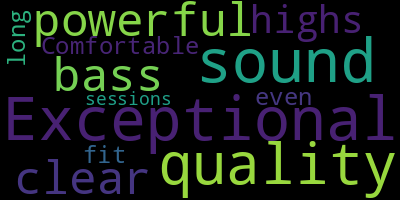

In [14]:

from textblob import TextBlob
from wordcloud import WordCloud

review = "Exceptional sound quality with powerful bass and clear highs. Comfortable fit even during long sessions."

blob = TextBlob(review)
polarity = blob.sentiment.polarity
print(polarity)
subjectivity = blob.sentiment.subjectivity
print(subjectivity)

if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print(sentiment)

wordcloud = WordCloud().generate(review)
wordcloud.to_image()

Question 6:

In [15]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
import numpy as np

tokenizer = Tokenizer()
text = """Artificial Intelligence is transforming industries worldwide.
It enables machines to learn from data and make decisions.
From healthcare to finance, AI is driving efficiency"""

tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index)+1
print(total_words)

input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre')

X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = np.array([np.eye(total_words)[i] for i in y])

model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,epochs=50,verbose=1)
def generate_text(seed_text,next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
        predicted = np.argmax(model.predict(token_list),axis=-1)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text

print(generate_text("Human",5))
print(generate_text("Space",6))
print(generate_text("Future",4))

22
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0476 - loss: 3.0898
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1905 - loss: 3.0839
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1905 - loss: 3.0780
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1429 - loss: 3.0718
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1429 - loss: 3.0653
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1429 - loss: 3.0583
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1429 - loss: 3.0506
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1429 - loss: 3.0420
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1429 - loss: 3.0322
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1429 - loss: 3.0211
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1429 - loss: 3.0081
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1429 - loss: 2.9929
Epoch 13/50
